# Importing libraries

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Loading datasets

In [2]:
#loading the data sets
Customers = pd.read_csv(R'C:\Users\anush\Downloads\Customers.csv')
Products = pd.read_csv(R"C:\Users\anush\Downloads\Products.csv")
Transactions = pd.read_csv(R"C:\Users\anush\Downloads\Transactions.csv")
print('Customers data Set')
print(Customers.describe())
print(Customers.head())
print(Customers.tail())


Customers data Set
       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2024-11-11
freq            1                 1             59           3
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
    CustomerID      CustomerName  Region  SignupDate
195      C0196       Laura Watts  Europe  2022-06-07
196      C0197  Christina Harvey  Europe  2023-03-21
197      C0198       Rebecca Ray  Europe  2022-02-27
198      C0199    Andrea Jenkins  Europe  2022-12-03
199      C0200       Kelly Cross    Asia 

In [3]:
print('Products data Set')
print(Products.describe())
print(Products.head())
print(Products.info())


Products data Set
            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None


In [4]:
print('Transactions data Set')
print(Transactions.describe())
print(Transactions.head())
print(Transactions.info())

Transactions data Set
          Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147.95000
50%       3.000000   588.880000   299.93000
75%       4.000000  1011.660000   404.40000
max       4.000000  1991.040000   497.76000
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price  
0      300.68  300.68  
1      300.68  300.68  
2      300.68  300.68  
3      601.36  300.68  
4      902.04  300.68  
<class 'pan

# checking for missing values

In [5]:
# checking for missing places
print("Missing Values in Customers:")
print(Customers.isnull().sum())
print("Missing Values in Products:")
print(Products.isnull().sum())
print("Missing Values in Transactions:")
print(Transactions.isnull().sum())

Missing Values in Customers:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
Missing Values in Products:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
Missing Values in Transactions:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


# Filling Null values

In [6]:
# filling Null values
Customers.fillna("Unknown", inplace=True)
Products.fillna("Unknown", inplace=True)
Transactions.fillna(0, inplace=True)


In [7]:
# Merging Data Sets
merged_data = Transactions.merge(Customers, on='CustomerID',
how='left')
merged_data = merged_data.merge(Products, on='ProductID', how='left')
print("Merged Dataset:")
print(merged_data.head())
print(merged_data.info())

Merged Dataset:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region  SignupDate  \
0      300.68   300.68   Andrea Jenkins         Europe  2022-12-03   
1      300.68   300.68  Brittany Harvey           Asia  2024-09-04   
2      300.68   300.68  Kathryn Stevens         Europe  2024-04-04   
3      601.36   300.68  Travis Campbell  South America  2024-04-11   
4      902.04   300.68    Timothy Perez         Europe  2022-03-15   

                       ProductName     Category  Price_y  
0  ComfortLiving Bluetooth Speaker  Electronics   300.68  
1  ComfortLiving B

# summary statistics

In [8]:
# summary statistics
print("Summary Statistics:")
print(merged_data.describe())

Summary Statistics:
          Quantity   TotalValue     Price_x     Price_y
count  1000.000000  1000.000000  1000.00000  1000.00000
mean      2.537000   689.995560   272.55407   272.55407
std       1.117981   493.144478   140.73639   140.73639
min       1.000000    16.080000    16.08000    16.08000
25%       2.000000   295.295000   147.95000   147.95000
50%       3.000000   588.880000   299.93000   299.93000
75%       4.000000  1011.660000   404.40000   404.40000
max       4.000000  1991.040000   497.76000   497.76000


# Customer Distribution by Region

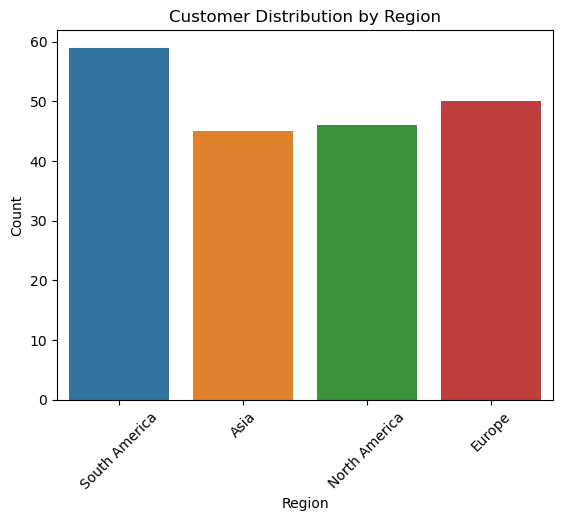

In [9]:
sns.countplot(data=Customers, x='Region')
plt.title("Customer Distribution by Region")
plt.xlabel("Region")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# Top 10 Products by Sales

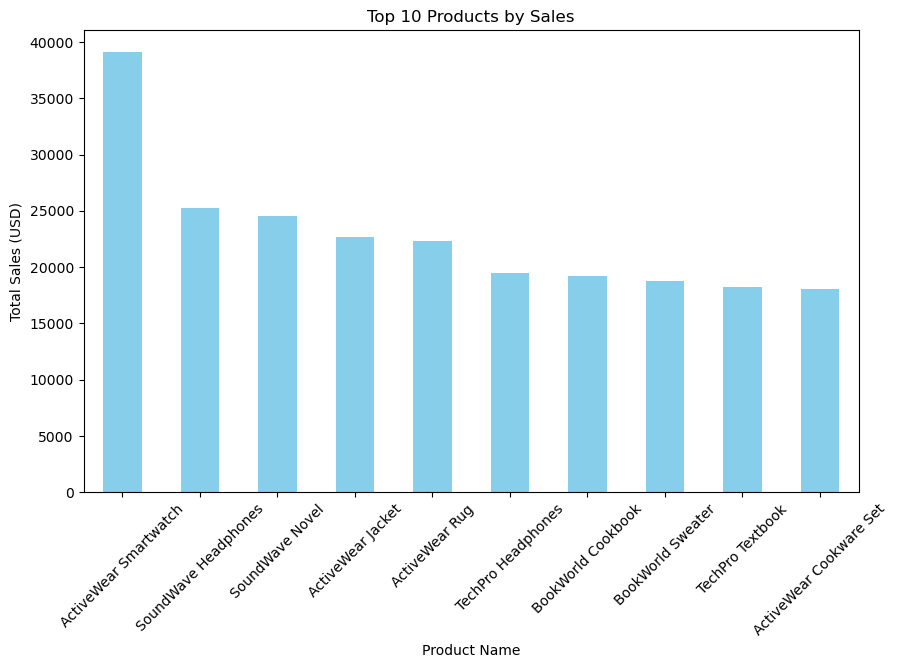

In [10]:
top_products = merged_data.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='bar', title='Top 10 Products by Sales',
figsize=(10, 6), color='skyblue')
plt.xlabel("Product Name")
plt.ylabel("Total Sales (USD)")
plt.xticks(rotation=45)
plt.show()

# Monthly Sales Trends

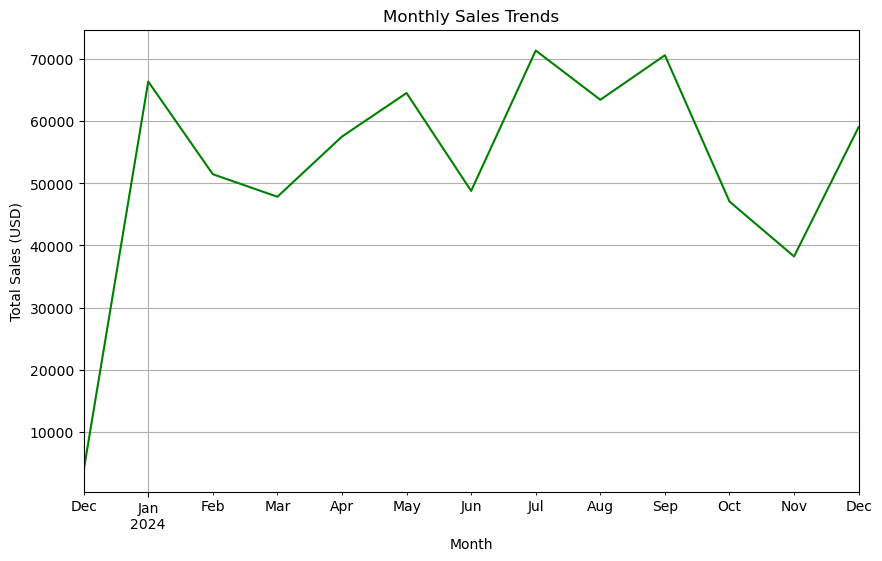

In [11]:
merged_data['TransactionDate'] =pd.to_datetime(merged_data['TransactionDate'])
monthly_sales =merged_data.groupby(merged_data['TransactionDate'].dt.to_period('M'))['TotalValue'].sum()
monthly_sales.plot(title='Monthly Sales Trends', figsize=(10, 6),
color='green')
plt.xlabel("Month")
plt.ylabel("Total Sales (USD)")
plt.grid()
plt.show()

# Top 5 Revenue- Generating Products

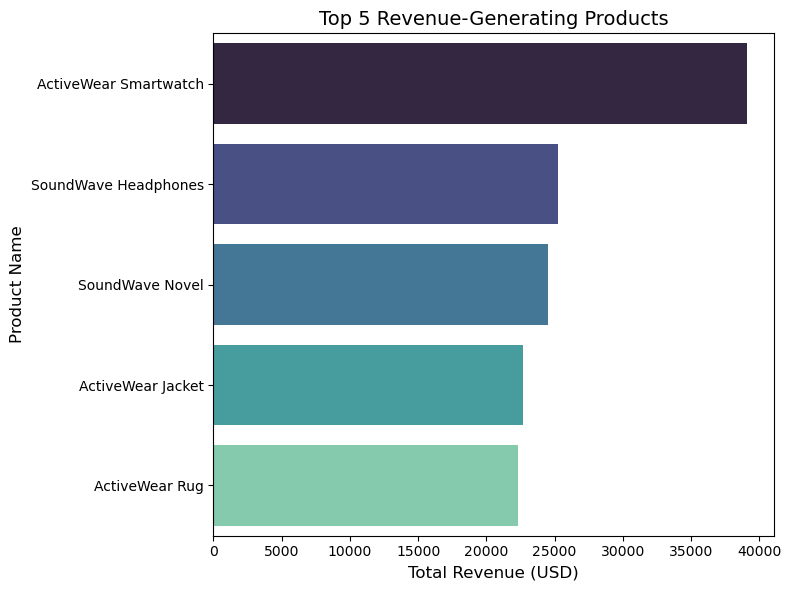

In [12]:
 #Top 5 Revenue-Generating Products
top_products_revenue = merged_data.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False).head(5)
plt.figure(figsize=(8, 6))
sns.barplot(y=top_products_revenue.index, x=top_products_revenue.values, palette="mako")
plt.title("Top 5 Revenue-Generating Products", fontsize=14)
plt.xlabel("Total Revenue (USD)", fontsize=12)
plt.ylabel("Product Name", fontsize=12)
plt.tight_layout()
plt.show()


# Revenue by Product Category

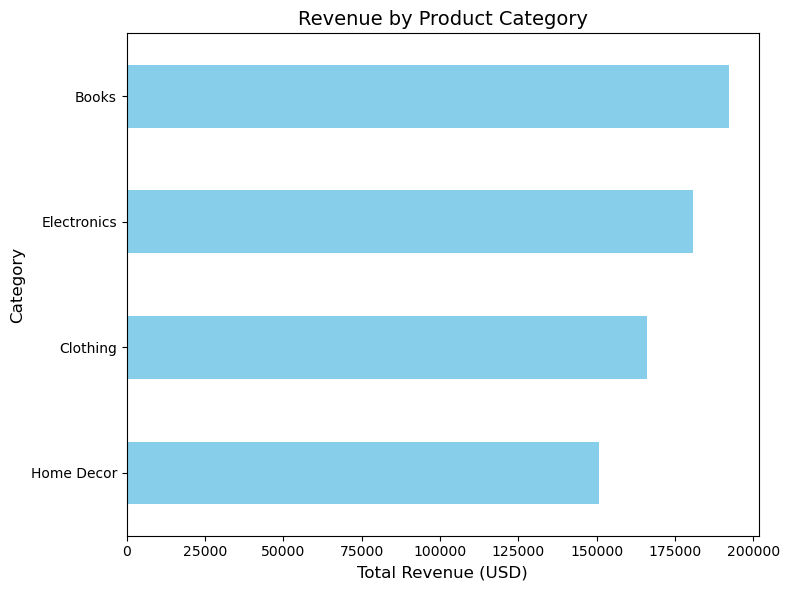

In [13]:
# 2. Revenue Contribution by Product Category
category_revenue = merged_data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 6))
category_revenue.sort_values().plot(kind='barh', color='skyblue', figsize=(8, 6))
plt.title("Revenue by Product Category", fontsize=14)
plt.xlabel("Total Revenue (USD)", fontsize=12)
plt.ylabel("Category", fontsize=12)
plt.tight_layout()
plt.show()
